## Predicting the Profit of a Company After Expense

#### Problem Statement
 Given the data for 50 startups, train a machine learning model so that it's capable of predicting the profit a company after their expense.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'
%matplotlib inline

In [88]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Loading the data

In [89]:
startups = pd.read_csv("50_Startups.csv")
startups.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


This dataset consists of 50 entries and 5 variables. `R&D Spend`, `Administration`, `Marketing Spend` and `Profit`
are all continuous numerical variables while `State` variable is a categorical variable.

Our objective is to estimate `Profit` using the other variables except for `State`.

In [90]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [91]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


From visual inspection, the dataset appears very clean due to the absense of Null values and negative values. Also,
none of the variables appear to be skewed in it's distribution. It's interesting to see that there are companies that
spent $0 on R&D and also on Marketing.

### Exploratory Analysis and Visualization

##### R&D Spend variable

In [92]:
startups["R&D Spend"].describe()

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64

In [93]:
fig = px.histogram(startups, 
                   x='R&D Spend', 
                   marginal='box',  
                   title='Distribution of R&D Spend')
fig.update_layout(bargap=0.01)
fig.show()

The distribution is almost normal. We can also see that most of the companies, on average, spent between $60k to $80k.

#### Administration variable

In [94]:
startups.Administration.describe()

count        50.000000
mean     121344.639600
std       28017.802755
min       51283.140000
25%      103730.875000
50%      122699.795000
75%      144842.180000
max      182645.560000
Name: Administration, dtype: float64

In [95]:
fig = px.histogram(startups, 
                   x='Administration', 
                   marginal='box',  
                   title='Distribution of Administration')
fig.update_layout(bargap=0.01)
fig.show()

The distribution resembles an exponential one with companies tending to spend more on Administration expenses.

#### Marketing Spend

In [96]:
startups["Marketing Spend"].describe()

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Marketing Spend, dtype: float64

In [97]:
fig = px.histogram(startups, 
                   x='Marketing Spend', 
                   marginal='box',  
                   title='Distribution of Marketing Spend')
fig.update_layout(bargap=0.01)
fig.show()

The distribution of Marketing expenses tends towards a normal distribution.

#### Profit

In [98]:
startups.Profit.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

In [99]:
fig = px.histogram(startups, 
                   x='Profit', 
                   marginal='box',  
                   title='Distribution of Profit')
fig.update_layout(bargap=0.01)
fig.show()

The distribution of Profit is a bit skewed to the right and it tends towards a normal distribution.

### Correlation Matrix

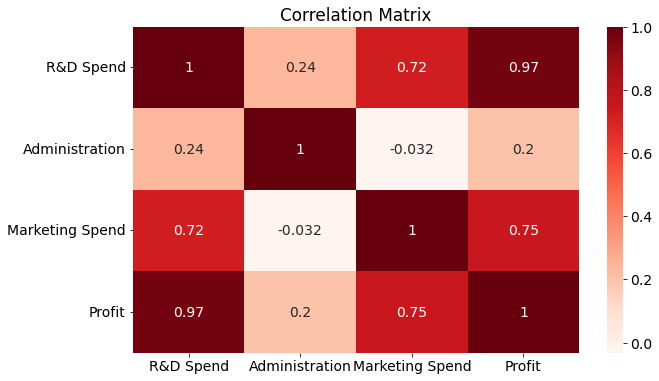

In [100]:
sns.heatmap(startups.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

We can see that R&D, Marketing expenses have a strong positive correlation with Profit while that of Administration and Profit is fair.

### Creating Model

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
predictors = ['R&D Spend', 'Administration', 'Marketing Spend']
outcome = 'Profit'

In [103]:
x = startups[predictors].to_numpy()
y = startups[outcome].to_numpy()
y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
# Linear regression model

startup_lm = LinearRegression()
startup_lm.fit(xtrain, ytrain)
ypred = startup_lm.predict(xtest)

In [105]:
startup_pred = pd.DataFrame({"Test":ytest.flatten(), "Predicted Values":ypred.flatten()})
startup_pred

,Test,Predicted Values
0,134307.35,126703.027165
1,81005.76,84894.750816
2,99937.59,98893.418160
3,64926.08,46501.708150
4,125370.37,129128.397344
5,35673.41,50992.694863
6,105733.54,109016.553658
7,107404.34,100878.464145
8,97427.84,97700.596386
9,122776.86,113106.152922
